Building and evaluating regression models to predict wind direction using numerical features from solar energy dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load and clean dataset
dataset = pd.read_csv('data.csv')
dataset = dataset.drop(columns=['Location', 'Season', 'Date'])  # drop non-numeric

In [3]:
# Check the column names
print(dataset.head())

   Latitude  Longitude  Altitude  Month  Hour  Windspeed  Winddirection  \
0     11.36      79.31        22      4    12   1.441298       168.3438   
1     11.36      79.31        22      4    12   1.223491       173.7634   
2     11.36      79.31        22      4    12   1.453270       179.7634   
3     11.36      79.31        22      4    12   1.260392       212.9149   
4     11.36      79.31        22      4    12   1.327019       249.2355   

   Moduletemp   Airtemp  Humidity  
0    32.90718  32.63613  65.57543  
1    33.64759  32.06549  73.99470  
2    32.87601  31.33049  77.70920  
3    32.55010  30.74547  82.60623  
4    31.52534  29.66753  78.51312  


In [4]:
# Separate features and target
X = dataset.drop(columns=['Winddirection'])
y = dataset['Winddirection'].values

In [5]:
# Reshape for SVR
ysvm = y.reshape(-1, 1)

In [6]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(X, ysvm, test_size=0.2, random_state=0)


In [7]:
# Scale for SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_trainsvm = sc_X.fit_transform(X_trainsvm)
y_trainsvm = sc_y.fit_transform(y_trainsvm)

In [8]:
# Model imports
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [9]:
# Linear Regression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

LinearRegression()

In [10]:
# Ridge Regression (regularized linear regression)
modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X_train, y_train)

Ridge()

In [11]:
# # Polynomial Regression (reduced degree to 2)
# poly_reg = PolynomialFeatures(degree=2)
# X_poly_train = poly_reg.fit_transform(X_train)
# X_poly_test = poly_reg.transform(X_test)
# modelPLR = LinearRegression()
# modelPLR.fit(X_poly_train, y_train)

In [11]:
# Decision Tree
modelDTR = DecisionTreeRegressor(random_state=0)
modelDTR.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [12]:
# Random Forest
modelRFR = RandomForestRegressor(n_estimators=100, random_state=0)
modelRFR.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [14]:
#Hyperparameter tuning to avoid overfitting for all the above regression used

In [13]:
# SVR with GridSearchCV
svr_params = {
    'C': [1, 20],
    'epsilon': [0.1, 0.5],
    'kernel': ['rbf']
}
svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2')
svr_grid.fit(X_trainsvm, y_trainsvm.ravel())
modelSVR = svr_grid.best_estimator_


In [14]:
DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=0)


DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=0)

In [15]:
# Ridge Regression Tuning
ridge_grid = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10]}, cv=10, scoring='r2')
ridge_grid.fit(X_train, y_train)
modelRidge = ridge_grid.best_estimator_

In [16]:
# Decision Tree Tuning
dtr_grid = GridSearchCV(DecisionTreeRegressor(random_state=0), {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}, cv=5, scoring='r2')
dtr_grid.fit(X_train, y_train)
modelDTR = dtr_grid.best_estimator_


In [17]:
# Random Forest Tuning
rfr_grid = GridSearchCV(RandomForestRegressor(random_state=0), {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}, cv=5, scoring='r2')
rfr_grid.fit(X_train, y_train)
modelRFR = rfr_grid.best_estimator_


In [18]:
modelLRy_pred = modelLR.predict(X_test) # Lienar Regression
ridge_pred = modelRidge.predict(X_test) # Ridge regression
modelDTRy_pred = modelDTR.predict(X_test) #Decision Tree
modelRFRy_pred = modelRFR.predict(X_test) # Random Forest
modelSVRy_pred = sc_y.inverse_transform(modelSVR.predict(sc_X.transform(X_test)).reshape(-1, 1)) #SVR

In [19]:
# Evaluation
print("Linear Regression Accuracy: {:.2f}%".format(r2_score(y_test, modelLRy_pred)*100))
print("Ridge Regression Accuracy: {:.2f}%".format(r2_score(y_test, ridge_pred)*100))
print("Decision Tree Regression Accuracy: {:.2f}%".format(r2_score(y_test, modelDTRy_pred)*100))
print("Random Forest Regression Accuracy: {:.2f}%".format(r2_score(y_test, modelRFRy_pred)*100))
print("SVR (Tuned) Accuracy: {:.2f}%".format(r2_score(y_test, modelSVRy_pred)*100))

Linear Regression Accuracy: 48.06%
Ridge Regression Accuracy: 48.06%
Decision Tree Regression Accuracy: 73.64%
Random Forest Regression Accuracy: 78.24%
SVR (Tuned) Accuracy: 71.48%


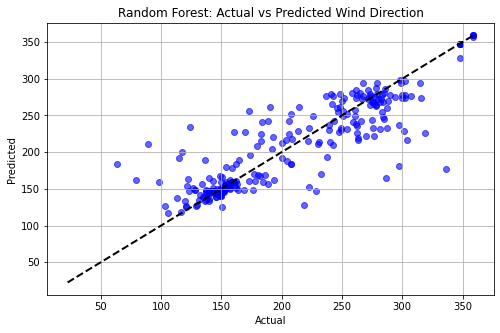

In [20]:
# Plot predictions vs actual for Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(y_test, modelRFRy_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Random Forest: Actual vs Predicted Wind Direction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


# MODEL

In [27]:
import joblib

# Save Linear Regression model
joblib.dump(modelLR, 'linear_model.pkl')

# Save Random Forest model
joblib.dump(modelRFR, 'random_forest_model.pkl')

# Save Decision Tree model
joblib.dump(modelDTR, 'decision_tree_model.pkl')

# Save SVR model and its scalers
joblib.dump(modelSVR, 'svr_model.pkl')
joblib.dump(sc_X, 'scaler_X.pkl')
joblib.dump(sc_y, 'scaler_y.pkl')

print("All models and transformers have been saved successfully.")


All models and transformers have been saved successfully.


In [29]:
import numpy as np
import joblib

# === Load models and transformers ===
modelLR   = joblib.load('linear_model.pkl')
modelRFR  = joblib.load('random_forest_model.pkl')
modelDTR  = joblib.load('decision_tree_model.pkl')
modelSVR  = joblib.load('svr_model.pkl')
sc_X      = joblib.load('scaler_X.pkl')
sc_y      = joblib.load('scaler_y.pkl')

# === New input ===
# Format: [latitude, longitude, altitude, windspeed, hour, month, moduletemp, airtemp, humidity]
new_data = np.array([[12.97, 77.59, 920, 4.5, 14, 4, 38.5, 32.2, 60]])

# === Predict Wind Direction ===

# Linear Regression
pred_lr = modelLR.predict(new_data)

# Random Forest
pred_rfr = modelRFR.predict(new_data)

# Decision Tree
pred_dtr = modelDTR.predict(new_data)

# SVR (with scaling)
scaled_input = sc_X.transform(new_data)
scaled_pred = modelSVR.predict(scaled_input)
pred_svr = sc_y.inverse_transform(scaled_pred.reshape(-1, 1))

# === Display Results ===
print(f"\n Predicted Wind Direction (degrees):")
print(f"Linear Regression:         {pred_lr[0]:.2f}°")
print(f"Random Forest Regression:  {pred_rfr[0]:.2f}°")
print(f"Decision Tree Regression:  {pred_dtr[0]:.2f}°")
print(f"Support Vector Regression: {pred_svr[0][0]:.2f}°")



 Predicted Wind Direction (degrees):
Linear Regression:         -6048.98°
Random Forest Regression:  199.70°
Decision Tree Regression:  182.70°
Support Vector Regression: 195.48°


C:\Users\91959\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\91959\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\91959\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\91959\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
